<a href="https://colab.research.google.com/github/adeiltonmsantos/DIO_reducao_dimensionalidade/blob/main/reducao_dimens_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de redução de dimensionalidades em imagens**

Este pequeno projeto de redução de dimensionalidades em imagens foi elaborado como resposta ao desafio de projeto do módulo **Redução de Dimensionalidade em Imagens para Redes Neurais** do curso **BairesDev - Machine Learning Practitioner** da **DIO**.

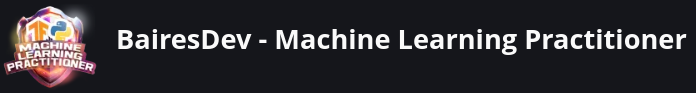

Clique no botão _Play_ abaixo para exibir um controle de formulário para que você possa fazer o upload da imagem desejada.

Após fazer o upload, serão exibidas miniaturas da imagem original, da mesma imagem em tons de cinza e da imagem binarizada (apenas em preto e branco). Abaixo de cada imagem é exibido um link para download.

In [ ]:
# @title
# Importações
from google.colab import files # Para exibir controle para upload de imagem
import imghdr # Para verificar se o arquivo uploaded é uma imagem
import cv2 # OpenCV, para converter a imagem em tons de cinza e para binarização
from google.colab.patches import cv2_imshow # Para exibir as imagens no Colab.

# Classe para redução de dimensionamento de imagens (tons de cinza e binarização)
class ImageReducer:
  def __init__(self):
    # Controle para realizar o upload da imagem, que resulta num dicionário com
    # o par chave/valor: 'nome do arquivo': arquivo da imagem
    uploaded = files.upload()

    # Nome do arquivo uploaded
    self.filename = list(uploaded.keys())[0] # Extraindo nome do arquivo
    self.grayscale_file = None # Futuro nome do arquivo em escala de cinza
    self.binary_file = None # Futuro nome do arquivo binarizado

  # Retorna True se o arquivo uploaded for uma imagem
  def valid_image(self):
    if imghdr.what(self.filename) is not None:
      return True
    else:
      return False

  # Reduz a imagem para níveis de cinza
  def grayScale(self):
    img = cv2.imread(self.filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    self.grayscale_file = 'grayScale_' + self.filename
    cv2.imwrite(self.grayscale_file, img)

  # Binariza a imagem
  def binary(self):
    # Reduz a imagem em tons de cinza, se ainda não foi feito
    if self.grayscale_file is None:
      self.grayScale()

    # Código para binarização com imagem em escala de cinza
    img_gray = cv2.imread(self.grayscale_file)
    img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)[1]
    self.binary_file = 'binary_' + self.filename
    cv2.imwrite(self.binary_file, img_bin)

  # Exibe a imagem original, seguida dela em escala de cinza e binarizada
  def show(self):
    # Exibe a imagem original
    img = cv2.imread(self.filename)
    print('\n---------------')
    print('Imagem original')
    print('---------------')
    cv2_imshow(img)

    # Exibe a imagem em escala de cinza
    if self.grayscale_file is None:
      self.grayScale()
      img = cv2.imread(self.grayscale_file)
      print('\n-----------------------')
      print('Imagem em tons de cinza')
      print('-----------------------')
      cv2_imshow(img)

    # Exibe a imagem binarizada
    if self.binary_file is None:
      self.binary()
      img = cv2.imread(self.binary_file)
      print('\n-----------------')
      print('Imagem binarizada')
      print('-----------------')
      cv2_imshow(img)

imgred = ImageReducer()

if imgred.valid_image():
  imgred.show()
else:
  print('Não é uma imagem')